# DBSCAN Algorithm

Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

__The DBSCAN algorithm uses two parameters:__

- minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
- eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

These parameters can be understood if we explore two concepts called __Density Reachability and Density Connectivity.__

__Reachability__ in terms of density establishes a point to be reachable from another __if it lies within a particular distance (eps) from it.__

__Connectivity__, on the other hand, involves a transitivity based chaining-approach to determine __whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.__

__There are three types of points after the DBSCAN clustering is complete:__

- Core — This is a point that has at least m points within distance n from itself.
- Border — This is a point that has at least one Core point at a distance n.
- Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

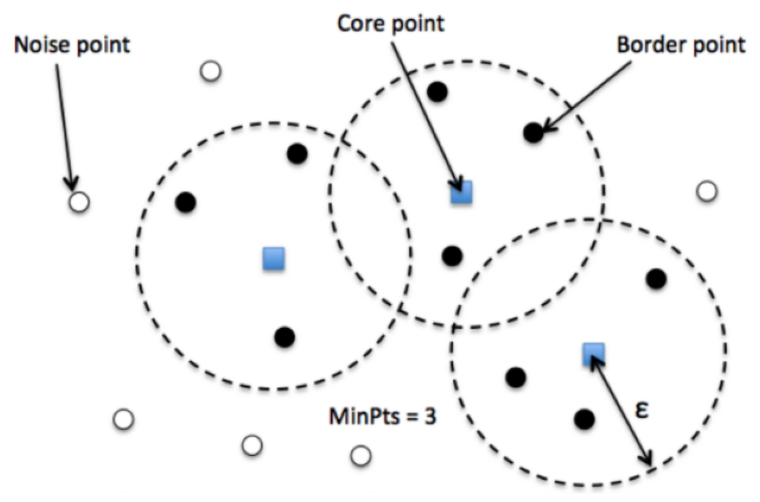

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img


plt.figure(figsize=(12, 10), dpi=80)
image = img.imread('points.png')
plt.axis('off')
plt.imshow(image)
plt.show()

### Algorithmic steps for DBSCAN clustering

- The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).
- If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.
- The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point

### Parameter Estimation

- __minPts__: As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as __minPts ≥ D + 1__. The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. __Therefore, minPts must be chosen at least 3__. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, __minPts = 2·dim__ can be used, but it may be necessary to __choose larger values for very large data, for noisy data or for data that contains many duplicates.__


- __ε__: The value for ε can then be chosen by using a k-distance graph, plotting the distance to the __k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster.__ In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.


- __Distance function__: The choice of __distance function is tightly linked to the choice of ε__, and has a major impact on the outcomes. In general,__it will be necessary to first identify a reasonable measure of similarity for the data set__, before the parameter ε can be chosen. There is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set.

## DBSCAN Python Implementation

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


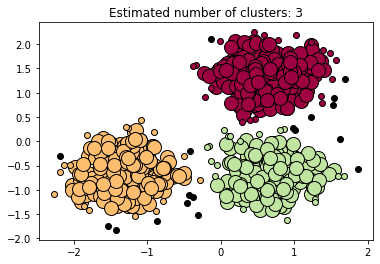

In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Number of clusters: 4
Homogeneity: 0.9999999999999999
Completeness: 0.5743409576262952
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: -0.028


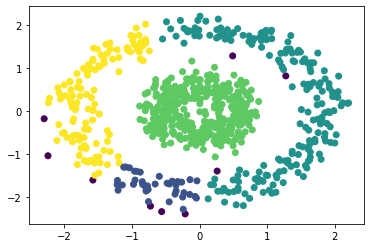

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

## The Complexity of DBSCAN
 

- Best Case: If an indexing system is used to store the dataset such that neighborhood queries are executed in logarithmic time, we get O(nlogn) average runtime complexity.


- Worst Case: Without the use of index structure or on degenerated data (e.g. all points within a distance less than ε), the worst-case run time complexity remains O(n²).


- Average Case: Same as best/worst case depending on data and implementation of the algorithm.

#### Sources : 
- a very good persian explaination : 
    -https://chistio.ir/%D8%A7%D9%84%DA%AF%D9%88%D8%B1%DB%8C%D8%AA%D9%85-%D8%AE%D9%88%D8%B4%D9%87-%D8%A8%D9%86%D8%AF%DB%8C-dbscan-%D9%85%D8%A8%D8%AA%D9%86%DB%8C-%D8%A8%D8%B1-%D8%BA%D9%84%D8%B8%D8%AA/
- https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html#:~:text=The%20DBSCAN%20algorithm%20uses%20two,the%20neighborhood%20of%20any%20point.